In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from datetime import datetime, timedelta, timezone
from datetime import timezone
sys.path.append('/home/manu/TFG_repo/scripts')

In [5]:
from config import data_dir
from analysis_functions import *
plt.style.use('/home/manu/TFG_repo/notebooks/notebook.mplstyle')

In [70]:
temp, pres, date, lat, lon = load_time_series('station7.nc')
df_fit_7 = load_SHDR_fit('station7_fit.csv')

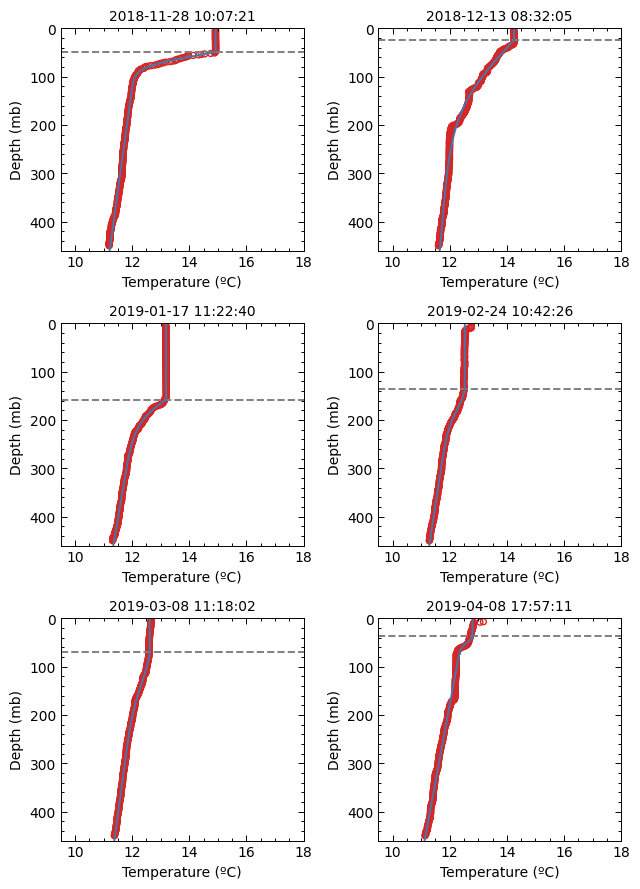

In [5]:
plot_multiple_profiles(df_fit, temp, pres, range(6))

In [58]:
temp, pres, date, lat, lon = load_time_series('processed/AGL_1_37_56_b3_test.nc')
df_fit_ref = load_SHDR_fit('AGL_1_37_56_b3_test_with_reference.csv')
df_fit = load_SHDR_fit('AGL_1_37_56_b3_test_fit.csv')
df_fit_cons =  load_SHDR_fit('AGL_1_37_56_b3_test_consecutive_fit.csv')

In [35]:
locs = np.linspace(0, len(date) -1, 26, dtype='int')

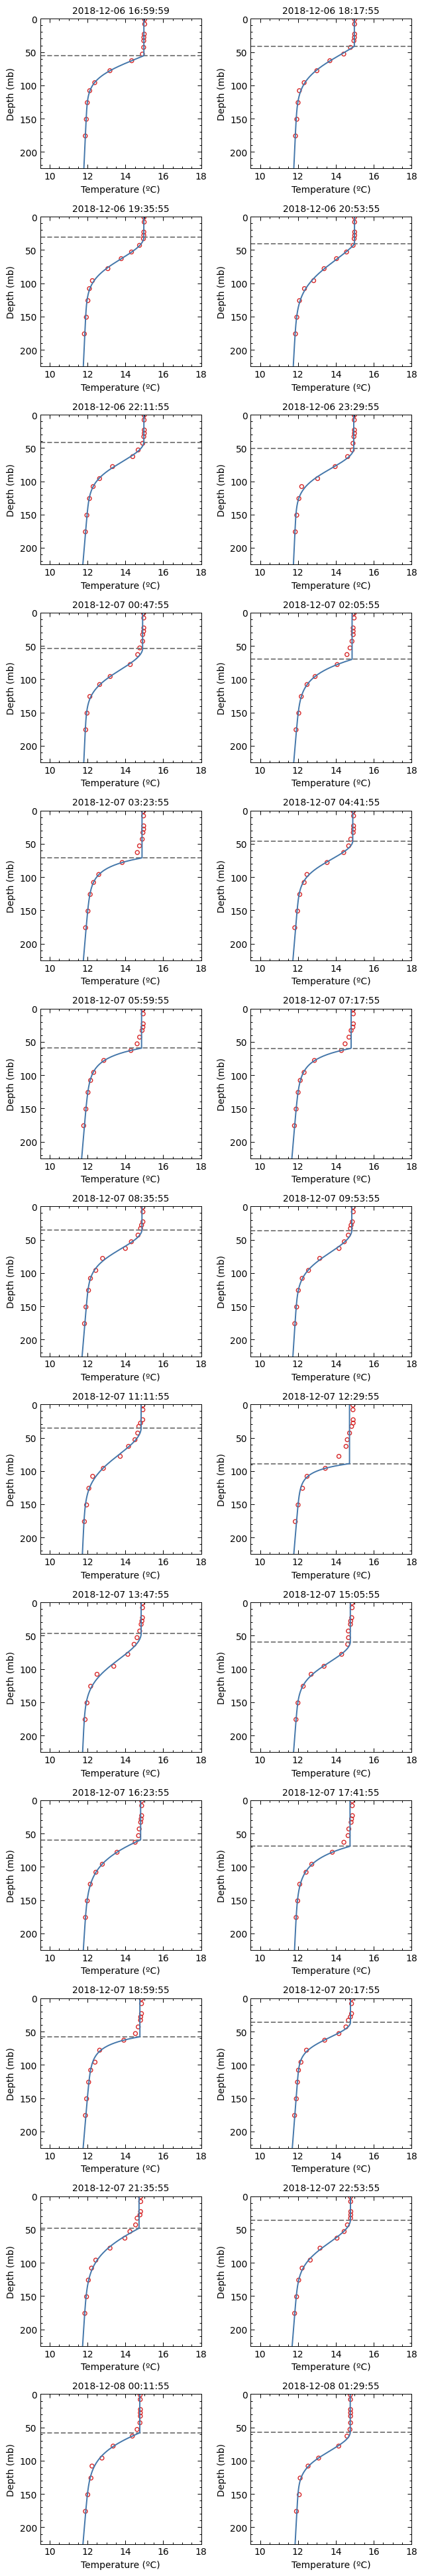

In [18]:
plot_multiple_profiles(df_fit_ref, temp, pres, locs)

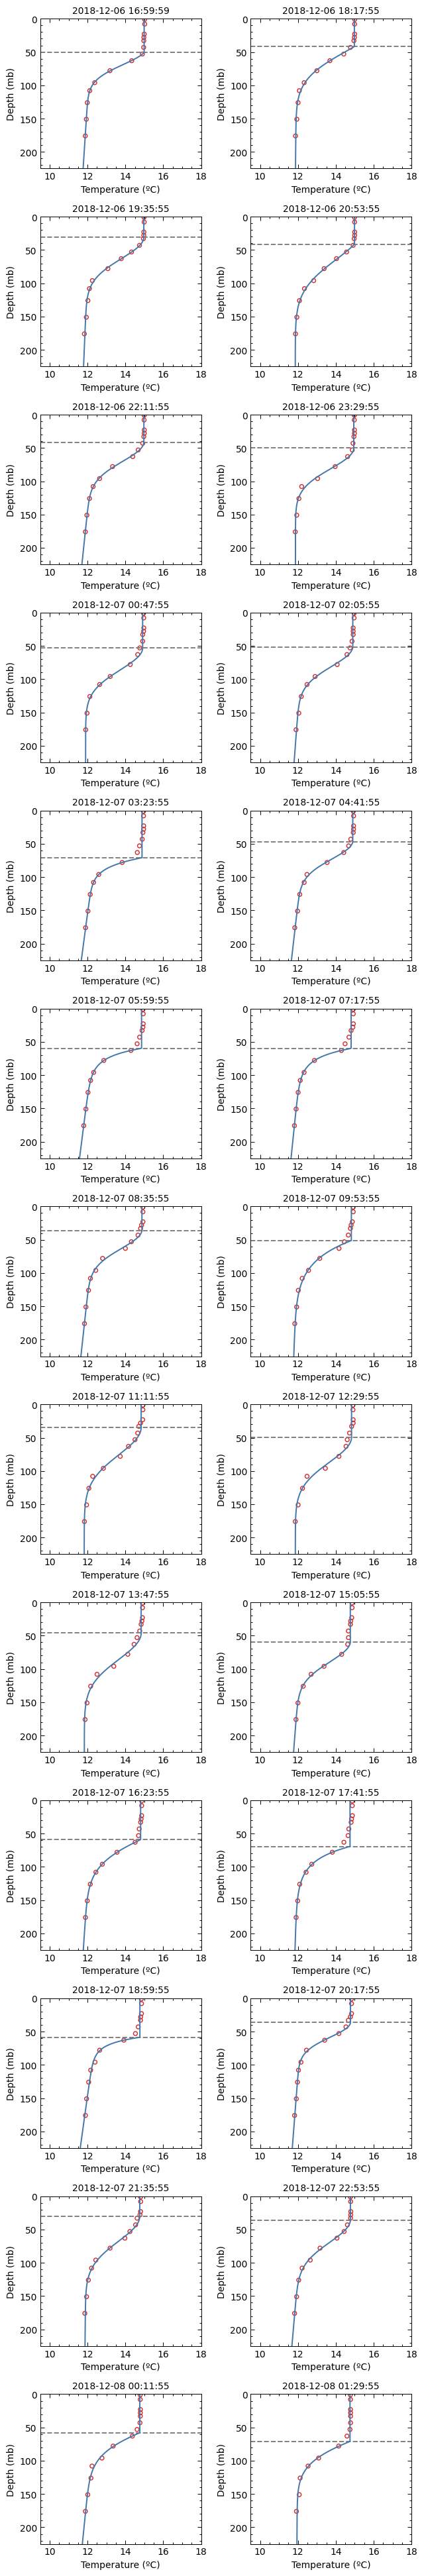

In [19]:
plot_multiple_profiles(df_fit, temp, pres, locs)

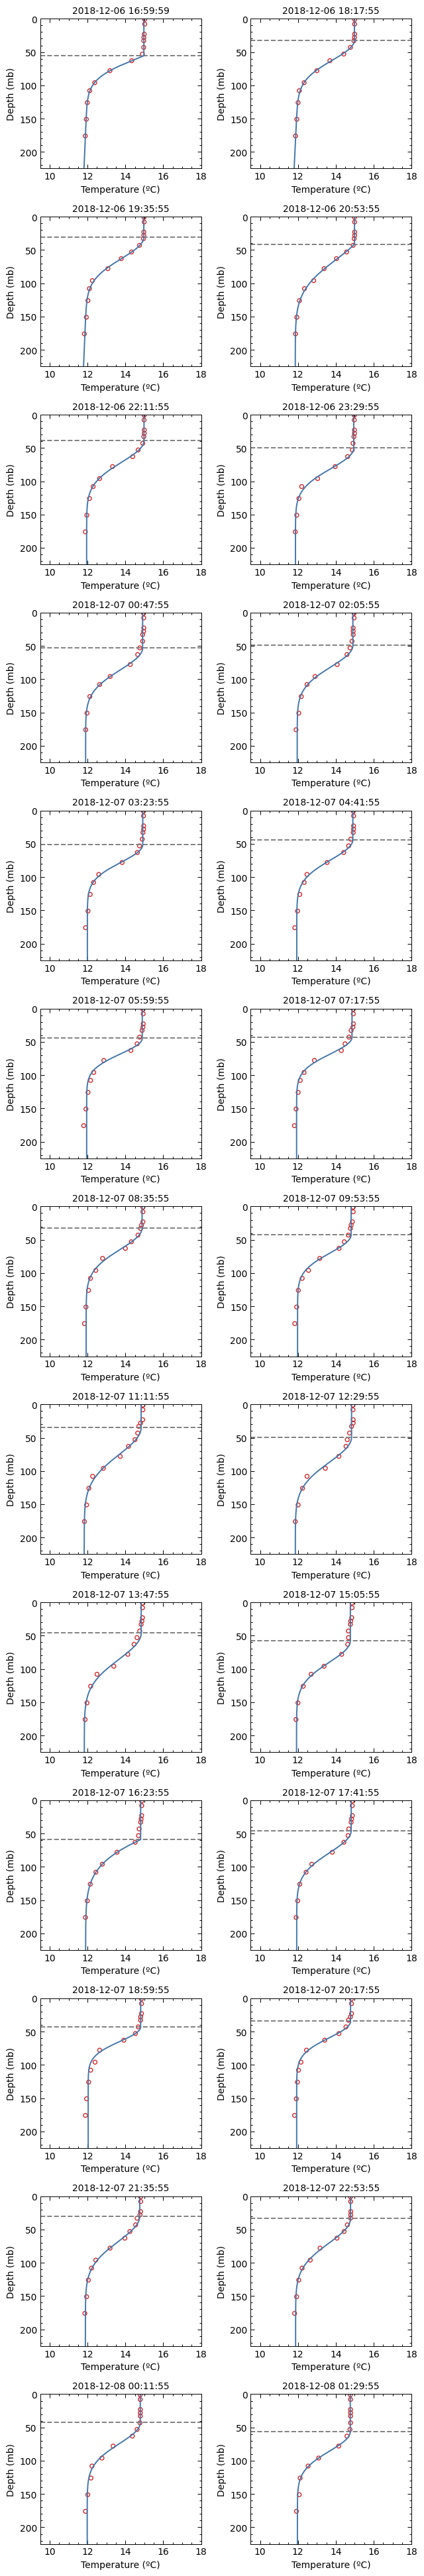

In [36]:
plot_multiple_profiles(df_fit_cons, temp, pres, locs)

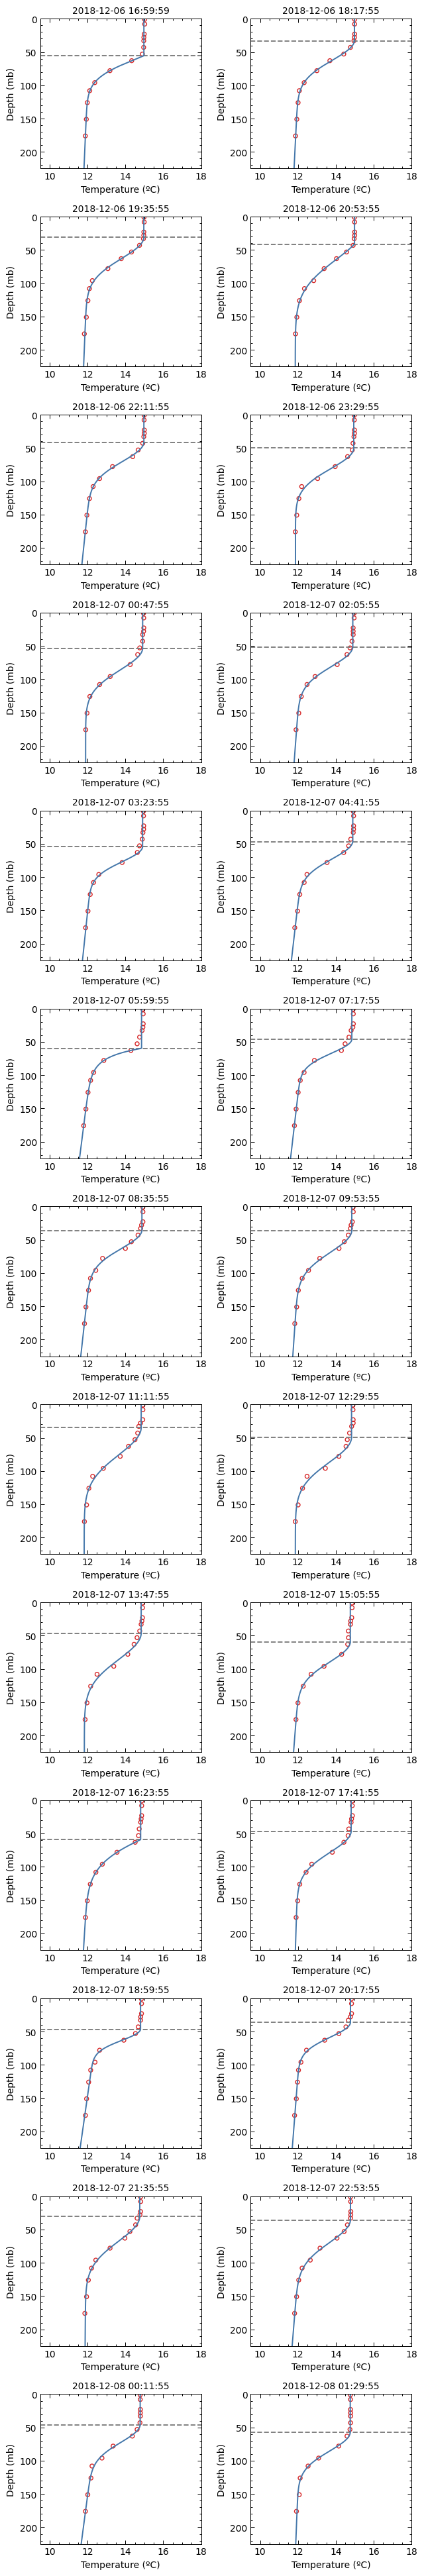

In [59]:
plot_multiple_profiles(df_fit_cons, temp, pres, locs)

In [26]:
print(df_fit_ref.loc[locs, ['Dates', 'b3']])

                    Dates        b3
0     2018-12-06 16:59:59 -0.001626
935   2018-12-06 18:17:55 -0.001626
1871  2018-12-06 19:35:55 -0.001626
2807  2018-12-06 20:53:55 -0.001913
3743  2018-12-06 22:11:55 -0.002972
4679  2018-12-06 23:29:55 -0.001626
5615  2018-12-07 00:47:55 -0.001626
6551  2018-12-07 02:05:55 -0.002972
7487  2018-12-07 03:23:55 -0.002972
8423  2018-12-07 04:41:55 -0.002972
9359  2018-12-07 05:59:55 -0.002972
10295 2018-12-07 07:17:55 -0.002972
11231 2018-12-07 08:35:55 -0.002972
12167 2018-12-07 09:53:55 -0.002289
13103 2018-12-07 11:11:55 -0.001626
14039 2018-12-07 12:29:55 -0.002972
14975 2018-12-07 13:47:55 -0.001626
15911 2018-12-07 15:05:55 -0.002724
16847 2018-12-07 16:23:55 -0.002200
17783 2018-12-07 17:41:55 -0.001626
18719 2018-12-07 18:59:55 -0.002972
19655 2018-12-07 20:17:55 -0.002714
20591 2018-12-07 21:35:55 -0.002200
21527 2018-12-07 22:53:55 -0.002821
22463 2018-12-08 00:11:55 -0.002972
23399 2018-12-08 01:29:55 -0.001913


In [25]:
print(df_fit.loc[locs, ['Dates', 'b3']])

                    Dates            b3
0     2018-12-06 16:59:59 -2.284592e-03
935   2018-12-06 18:17:55 -2.842313e-04
1871  2018-12-06 19:35:55 -1.446099e-03
2807  2018-12-06 20:53:55  0.000000e+00
3743  2018-12-06 22:11:55 -3.681739e-03
4679  2018-12-06 23:29:55  0.000000e+00
5615  2018-12-07 00:47:55  0.000000e+00
6551  2018-12-07 02:05:55 -2.633209e-03
7487  2018-12-07 03:23:55 -4.683700e-03
8423  2018-12-07 04:41:55 -4.040713e-03
9359  2018-12-07 05:59:55 -4.467035e-03
10295 2018-12-07 07:17:55 -3.576178e-03
11231 2018-12-07 08:35:55 -3.798261e-03
12167 2018-12-07 09:53:55 -1.089130e-03
13103 2018-12-07 11:11:55  0.000000e+00
14039 2018-12-07 12:29:55 -4.165277e-10
14975 2018-12-07 13:47:55  0.000000e+00
15911 2018-12-07 15:05:55 -2.721506e-03
16847 2018-12-07 16:23:55 -2.305092e-03
17783 2018-12-07 17:41:55 -9.578554e-04
18719 2018-12-07 18:59:55 -4.889629e-03
19655 2018-12-07 20:17:55 -2.714191e-03
20591 2018-12-07 21:35:55 -3.247528e-04
21527 2018-12-07 22:53:55 -3.024969e-03


In [70]:
def fit_and_fit_with_reference(df_fit, df_fit_ref, temp, pres, loc):
    
    temp = masked_to_array(temp[loc])
    pres = masked_to_array(pres[loc])
    zz = np.linspace(0, pres[-1] + 5, 300)    
    
    fig, ax = plt.subplots(figsize=(4, 4.6875))
    ax.scatter(temp, pres, marker='o', fc='None', ec='tab:red', s=22)
    ax.axhline(df_fit.iloc[loc, 3], c='grey', ls='--', label='MLD no ref') # plot MLD
    ax.axhline(df_fit_ref.iloc[loc, 3], c='grey', ls=':', label='MLD ref') # plot MLD
    ax.set_ylim(pres[-1] + 10, 0)
    ax.set_xlim(9.5, 18)
    ax.plot(fit_function(zz, df_fit, loc), zz, ls='--', label='no reference')
    ax.plot(fit_function(zz, df_fit_ref, loc), zz, label='reference')
    ax.set_xlabel('Temperature (ºC)')
    ax.set_ylabel('Depth (mb)')
    ax.set_title(df_fit['Dates'].iloc[loc])
    ax.legend()
    fig.tight_layout()
    plt.show()


In [71]:
locs_no_reference = df_fit.index[df_fit['em'] > np.mean(df_fit['em']) + np.std(df_fit['em'])]
locs_reference = df_fit_ref.index[df_fit_ref['em'] > np.mean(df_fit['em']) + np.std(df_fit['em'])]
print(np.std(df_fit['em']), np.std(df_fit_ref['em']))

0.03133701728191908 0.03246304184769462


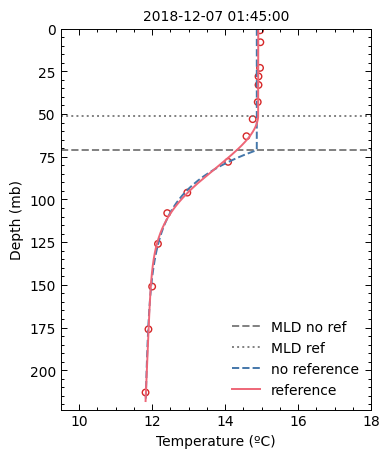

In [97]:
fit_and_fit_with_reference(df_fit, df_fit_ref, temp, pres, 6300)

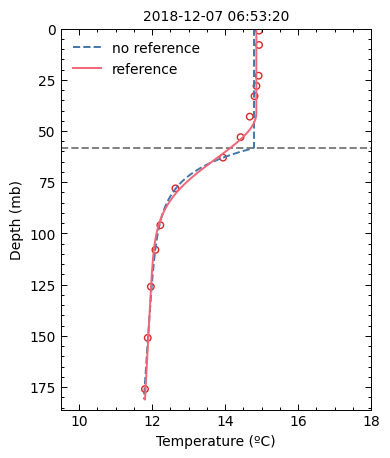

In [45]:
fit_and_fit_with_reference(df_fit, df_fit_ref, temp, pres, 10000)

loc = df_fit.index[df_fit['em'] > np.mean(df_fit['em']) + np.std(df_fit['em'])]

In [57]:
row = 3
a = array[1:, row]
b = array[:-1, row]
c = np.divide(a, b, out=np.zeros_like(a), where=b!=0)
print(np.mean(c))

2041853137403828.0


In [68]:
print(df_fit_cons.loc[locs, ['Dates', 'b3']])

                    Dates            b3
0     2018-12-06 16:59:59 -1.534794e-03
935   2018-12-06 18:17:55 -1.750612e-03
1871  2018-12-06 19:35:55 -1.436493e-03
2807  2018-12-06 20:53:55  0.000000e+00
3743  2018-12-06 22:11:55 -3.681626e-03
4679  2018-12-06 23:29:55  0.000000e+00
5615  2018-12-07 00:47:55  0.000000e+00
6551  2018-12-07 02:05:55 -2.609425e-03
7487  2018-12-07 03:23:55 -3.693844e-03
8423  2018-12-07 04:41:55 -4.040713e-03
9359  2018-12-07 05:59:55 -4.467035e-03
10295 2018-12-07 07:17:55 -4.069635e-03
11231 2018-12-07 08:35:55 -3.877300e-03
12167 2018-12-07 09:53:55 -2.380985e-03
13103 2018-12-07 11:11:55  0.000000e+00
14039 2018-12-07 12:29:55 -1.268050e-17
14975 2018-12-07 13:47:55  0.000000e+00
15911 2018-12-07 15:05:55 -2.723776e-03
16847 2018-12-07 16:23:55 -2.109691e-03
17783 2018-12-07 17:41:55 -1.080309e-03
18719 2018-12-07 18:59:55 -4.989970e-03
19655 2018-12-07 20:17:55 -2.714188e-03
20591 2018-12-07 21:35:55 -2.463256e-04
21527 2018-12-07 22:53:55 -2.833657e-03


In [74]:
print(np.mean(df_fit_7['b3']), np.std(df_fit_7['b3']))

-0.0024423062705465335 0.0005296113034267446
